In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [163]:
# File obtained from 
# 1. Filtered kmer list 
# 2. Generation info
# 3. Added a lot of false positive related information in projects2020_ohsu/eth/debug/debug_false_positives/p20230307_filter_allRF_quality_check.ipynb
path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/chosen_filters_06March_order/G_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2.tsv.gz'

In [164]:
df = pd.read_csv(path, sep = '\t')
display(df.head())


,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGAAOA0JM01A21RA05607all,TCGABHA18V01A11RA12D07all,TCGAA2A0D201A21RA03407all,TCGAA2A0SX01A12RA08407all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available
0,KSKTRPISD,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801333:16795006:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False
1,SKTRPISDS,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801330:16795003:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False
2,YKSKTRPIS,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801336:16795009:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False
3,LYKSKTRPI,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801339:16795012:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False
4,ALYKSKTRP,NaN,NaN,NaN,NaN,NaN,NaN,16801319:16801342:16795015:16795019:None:None,False,False,...,18.921476,0.0,0.0,0.0,NaN,-,16795019:16801319,False,False,False


In [165]:
print(df.columns)


Index(['kmer', 'gtexCohortfilter >0.0', 'gtexCohortfilter >=1.0',
       'gtexCohortfilter >=2.0', 'gtexCohortfilter >=3.0',
       'gtexCohortfilter >=5.0', 'gtexCohortfilter >=10.0', 'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 'cancerCohortfilter >=1.0',
       'cancerCohortfilter >=2.0', 'cancerCohortfilter >=3.0',
       'cancerCohortfilter >=5.0', 'cancerCohortfilter >=10.0',
       'TCGAC8A12P01A11RA11507all', 'TCGAAOA0JM01A21RA05607all',
       'TCGABHA18V01A11RA12D07all', 'TCGAA2A0D201A21RA03407all',
       'TCGAA2A0SX01A12RA08407all', 'isAnnotated', 'strand',
       'junction_coordinate', 'coordinate_in_GTEX', 'gtexExon2<cancExon2',
       'info_not_available'],
      dtype='object')


In [166]:
recurr_col = 'cancerCohortfilter >0.0'
expr_col = 'TCGAAOA0JM01A21RA05607all'
check_in_gtex_coord = 'coordinate_in_GTEX'
check_exons_length = 'gtexExon2<cancExon2'
jxannot = 'junctionAnnotated'
rfannot = 'readFrameAnnotated'
idx = 'index'
info = 'info_not_available'
df = df.sort_values(by=[recurr_col])
df[idx] = np.arange(len(df))

In [167]:
df[[recurr_col, expr_col, check_in_gtex_coord, check_exons_length, jxannot, rfannot, info, idx]].tail(20)

,cancerCohortfilter >0.0,TCGAAOA0JM01A21RA05607all,coordinate_in_GTEX,gtexExon2<cancExon2,junctionAnnotated,readFrameAnnotated,info_not_available,index
733,922,8.409545,False,False,False,False,False,1119
734,922,8.409545,False,False,False,False,False,1120
735,922,8.409545,False,False,False,False,False,1121
1018,982,10.511931,True,True,True,False,False,1122
1017,982,10.511931,True,True,True,False,False,1123
221,1017,25.228635,True,True,True,False,False,1124
220,1017,25.228635,True,True,True,False,False,1125
219,1017,25.228635,True,True,True,False,False,1126
131,1046,4.204772,True,True,True,True,False,1127
132,1046,4.204772,True,True,True,False,False,1128


<BarContainer object of 1139 artists>

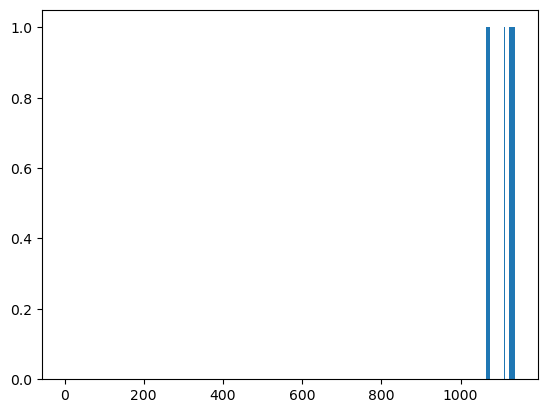

In [168]:
plt.bar(df[idx], df[check_exons_length])

In [169]:
#df = df.tail(20)

/scratch/slurm-job.833615/ipykernel_2708646/2748363196.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='b', linestyle='-')
/scratch/slurm-job.833615/ipykernel_2708646/2748363196.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='b', linestyle='--')
/scratch/slurm-job.833615/ipykernel_2708646/2748363196.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


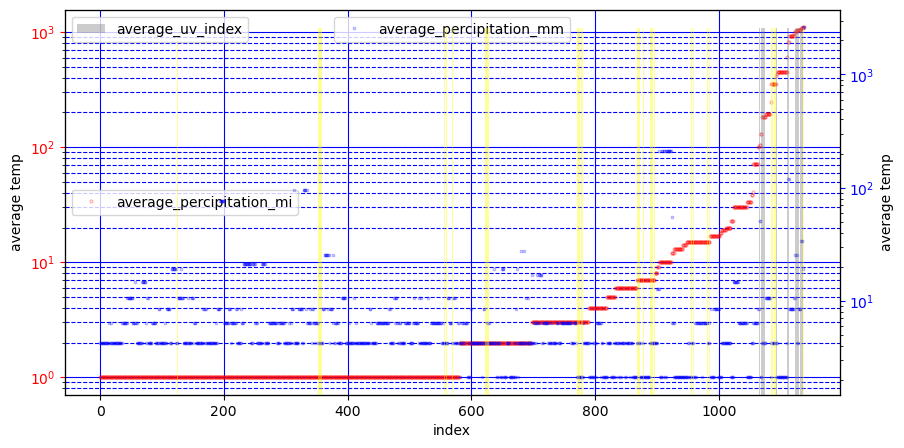

In [172]:
marker_size = 2
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax3 = ax.twinx()

# Ax 1
df.plot(x=idx, y=recurr_col, ax=ax, legend=False, marker="o", alpha=0.3,
        linestyle = 'None', markerfacecolor='None', markeredgecolor='r', markersize=marker_size)
ax.legend(['average_percipitation_mi'], loc="center left")
ax.set_ylabel('average temp')
ax.tick_params(axis='y', colors='r')
ax.grid(b=True, which='major', color='b', linestyle='-')
ax.grid(b=True, which='minor', color='b', linestyle='--')

# Ax 2
df.plot(x=idx, y=expr_col, ax=ax2, legend=False, marker="s", alpha=0.3,
              linestyle = 'None',markerfacecolor='None', markeredgecolor='b', markersize=marker_size)
ax2.legend(['average_percipitation_mm'], loc="upper center")
ax2.set_ylabel('average temp')
ax2.tick_params(axis='y', colors='b') #, labelsize=14)

# Ax 3
ax3.bar(x=df[idx], height=df[check_exons_length], alpha = 0.4, color='grey')
ax3.legend(['average_uv_index'], loc="upper left")
ax3.tick_params(axis='y', colors='grey') #, labelsize=14)
ax3.set_yticks([])
ax3.set_yticks([], minor=False)

# Ax 4
ax3.bar(x=df[idx], height=df[info], alpha = 0.4, color='yellow')
ax3.legend(['average_uv_index'], loc="upper left")
ax3.tick_params(axis='y', colors='grey') #, labelsize=14)
ax3.set_yticks([])
ax3.set_yticks([], minor=False)

# All plots
ax.set_yscale("log")
ax2.set_yscale("log")
#ax.figure.legend()
fig.show()

/scratch/slurm-job.833615/ipykernel_2708646/570371075.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


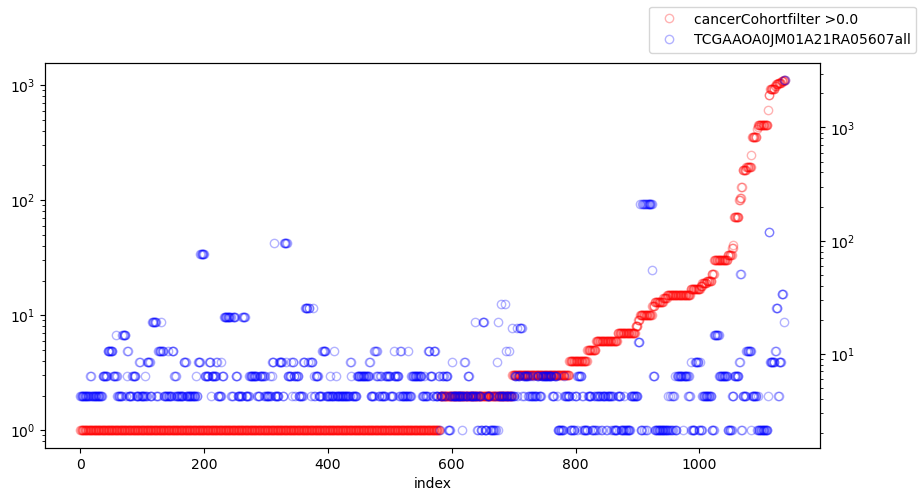

In [85]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

df.plot(x=idx, y=recurr_col, ax=ax, legend=False, marker="o", alpha=0.3,
        linestyle = 'None',markerfacecolor='None', markeredgecolor='r')

df.plot(x=idx, y=expr_col, ax=ax2, legend=False, marker="o", alpha=0.3,
              linestyle = 'None',markerfacecolor='None', markeredgecolor='b')
# Fill with face color

ax.set_yscale("log")
ax2.set_yscale("log")
ax.figure.legend()
fig.show()